In [1]:
import numpy as np
import matplotlib.pyplot as plt

Angle = 10
Time of flight = 0.9824799999981635
Range = 18.809957079656005
Angle = 16
Time of flight = 1.5007400000013642
Range = 21.539321926078443
Angle = 17
Time of flight = 1.5825300000019
Range = 21.589015547101507
Angle = 18
Time of flight = 1.6630700000024277
Range = 21.54257461567499
Angle = 20
Time of flight = 1.8204600000034588
Range = 21.185456001569396
Angle = 30
Time of flight = 2.5370700000081534
Range = 15.35663987563931
Angle = 40
Time of flight = 3.1424300000121193
Range = 5.251734114413538
Angle = 45
Time of flight = 3.404620000013837
Range = -0.6891319636557253
Angle = 50
Time of flight = 3.6399700000153787
Range = -6.962195193820161
Angle = 60
Time of flight = 4.0297000000166125
Range = -19.927781189149243


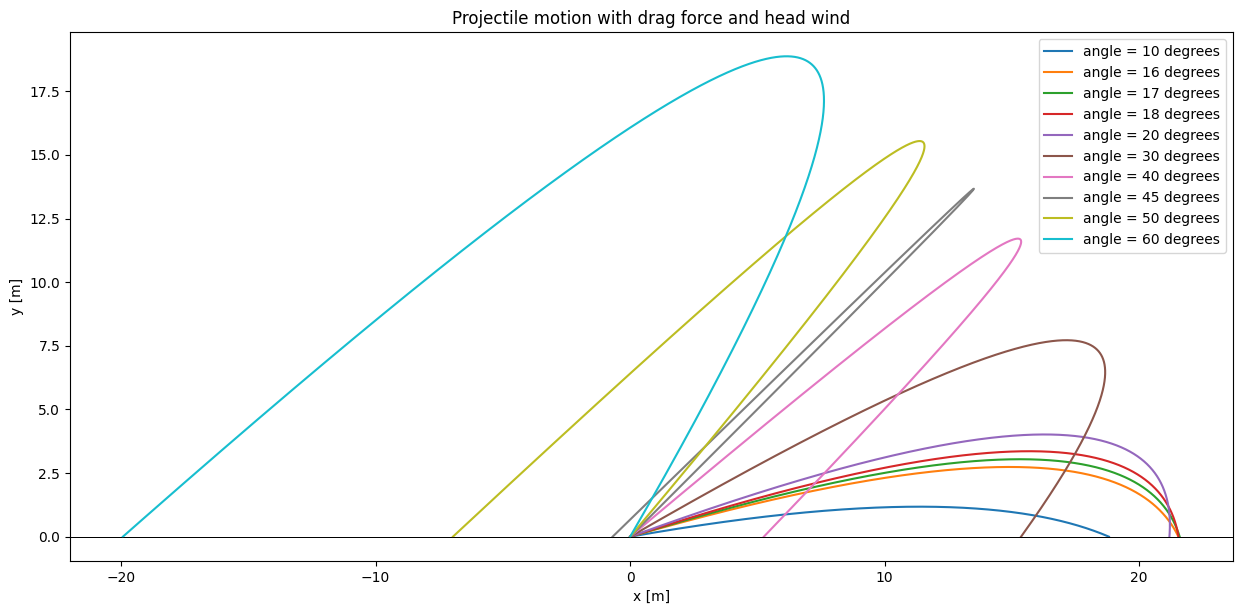

In [2]:
# Projectile motion with drag force and head wind

# Define the time step and number of points
dt = 0.00001
npts = 500000

angles = [10, 16, 17, 18, 20, 30, 40, 45, 50, 60]
#angles = [16.8, 16.9, 17.0, 17.1, 17.2]
#angles = [44.42, 44.43, 44.437, 44.44, 44.45]
#angles = np.linspace(16.8,17.2,10)

fig, axis = plt.subplots(1, 1, figsize=(15,15))

for i in range(len(angles)):

    # Define the parameters
    mass = 1.0
    angle =angles[i]*np.pi/180.0
    v0 = 30.0
    g = 9.80524

    # Initialize the arrays
    time = np.zeros(npts)
    x = np.zeros(npts)
    y = np.zeros(npts)
    vx = np.zeros(npts)
    vy = np.zeros(npts)
    ax = np.zeros(npts)
    ay = np.zeros(npts)

    # Define the acceleration function
    def a(vx, vy):
        global g
        ax = -10.0 - 0.5*vx
        ay = -g - 0.5*vy
        return ax, ay

    # Set the initial conditions
    time[0] = 0.0
    x[0] = 0.0
    y[0] = 0.0
    vx[0] = v0*np.cos(angle)
    vy[0] = v0*np.sin(angle)
    ax[0], ay[0] = a(vx[0], vy[0])

    # Loop over the time points, until the projectile hits the ground
    for t in range(1,npts):
        # Euler Method
    
        # update time
        time[t] = time[t-1] + dt
    
        # update position
        x[t] = x[t-1] + vx[t-1]*dt
        y[t] = y[t-1] + vy[t-1]*dt
    
        # update velocity
        vx[t] = vx[t-1] + ax[t-1]*dt
        vy[t] = vy[t-1] + ay[t-1]*dt
    
        # update acceleration
        ax[t], ay[t] = a(vx[t], vy[t])
    
        # check if the projectile hits the ground
        if y[t] < 0.0:
            print('Angle =', angles[i])
            print('Time of flight =', time[t])
            print('Range =', x[t])
            break

    # Plot the results

    axis.plot(x[:t], y[:t], label='angle = '+str(angles[i])+' degrees')
    axis.set_aspect('equal')
    axis.set_xlabel('x [m]')
    axis.set_ylabel('y [m]')
    axis.set_title('Projectile motion with drag force and head wind')

    # draw horizontal line (ground)
    axis.axhline(0, color='black', lw=0.5)

axis.legend()
#axis.set_xlim(21.585,21.590)
#axis.set_ylim(0,0.02)
plt.show()